# Preprocessing of the Microbiome Data with Analysis

## Python Modules and Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
merged_df = pd.read_table('/Users/naifganadily/Desktop/Artificial Intelligence for Precision Nutrition Bootcamp/gut-microbiome-precision-nutrition/data/results/merged.hmp.h1.truth.cleaned.txt', index_col=0)

In [3]:
# Add the columns to a list to be easily integrated
encoding_columns = ['Sex', 'Class', 'Race', 'IR_IS']
func_encoder = OneHotEncoder(sparse=False, drop='first')
encoded_columns = func_encoder.fit_transform(merged_df[encoding_columns])
encoded_columns = pd.DataFrame(encoded_columns, columns=func_encoder.get_feature_names_out(encoding_columns))

merged_df = merged_df.drop(columns=encoding_columns)
df_onehot = pd.concat([merged_df.reset_index(drop=True), encoded_columns.reset_index(drop=True)], axis=1)

display(df_onehot)

/Users/naifganadily/opt/anaconda3/envs/cv_humans/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,BMI,SSPG,phylum_Actinobacteria,phylum_Bacteroidetes,phylum_Firmicutes,phylum_Proteobacteria,phylum_Verrucomicrobia,phylum_unclassified_Bacteria,class_Actinobacteria,class_Bacilli,class_Bacteroidia,class_Betaproteobacteria,class_Clostridia,class_Deltaproteobacteria,class_Erysipelotrichia,class_Gammaproteobacteria,class_Negativicutes,class_Verrucomicrobiae,class_unclassified_Bacteria,class_unclassified_Firmicutes,order_Bacteroidales,order_Burkholderiales,order_Clostridiales,order_Coriobacteriales,order_Desulfovibrionales,order_Enterobacteriales,order_Erysipelotrichales,order_Lactobacillales,order_Selenomonadales,order_Verrucomicrobiales,order_unclassified_Bacteria,order_unclassified_Firmicutes,family_Acidaminococcaceae,family_Bacteroidaceae,family_Clostridiaceae.1,family_Clostridiales_Incertae.Sedis.XIII,family_Coriobacteriaceae,family_Desulfovibrionaceae,family_Enterobacteriaceae,family_Erysipelotrichaceae,family_Lachnospiraceae,family_Peptostreptococcaceae,family_Porphyromonadaceae,family_Prevotellaceae,family_Rikenellaceae,family_Ruminococcaceae,family_Streptococcaceae,family_Sutterellaceae,family_Veillonellaceae,family_Verrucomicrobiaceae,family_unclassified_Bacteria,family_unclassified_Clostridiales,family_unclassified_Firmicutes,genus_Akkermansia,genus_Alistipes,genus_Anaerotruncus,genus_Anaerovorax,genus_Bacteroides,genus_Barnesiella,genus_Bilophila,genus_Blautia,genus_Butyricicoccus,genus_Butyricimonas,genus_Clostridium.IV,genus_Clostridium.XI,genus_Clostridium.XVIII,genus_Clostridium.XlVa,genus_Clostridium.XlVb,genus_Clostridium.sensu.stricto,genus_Collinsella,genus_Coprococcus,genus_Dorea,genus_Eggerthella,genus_Erysipelotrichaceae_incertae_sedis,genus_Faecalibacterium,genus_Flavonifractor,genus_Holdemania,genus_Lachnospiracea_incertae_sedis,genus_Odoribacter,genus_Oscillibacter,genus_Parabacteroides,genus_Parasutterella,genus_Phascolarctobacterium,genus_Prevotella,genus_Pseudoflavonifractor,genus_Roseburia,genus_Ruminococcus,genus_Streptococcus,genus_Veillonella,genus_unclassified_Bacteria,genus_unclassified_Clostridiales,genus_unclassified_Clostridiales_Incertae.Sedis.XIII,genus_unclassified_Coriobacteriaceae,genus_unclassified_Erysipelotrichaceae,genus_unclassified_Firmicutes,genus_unclassified_Lachnospiraceae,genus_unclassified_Porphyromonadaceae,genus_unclassified_Ruminococcaceae,Sex_M,Class_Crossover,Class_Diabetic,Class_Prediabetic,Race_B,Race_C,Race_H,IR_IS_IS
0,58.65,31.24,162.00,0.013645,0.582611,0.298357,0.104188,0.000128,0.000663,0.013645,0.000969,0.582611,0.044149,0.270736,0.013518,0.010253,0.000765,0.016374,0.000128,0.000663,0.000025,0.582611,0.044149,0.270736,0.012829,0.013518,0.000765,0.010253,0.000408,0.016374,0.000128,0.000663,0.000025,0.016272,0.535579,0.002117,0.000663,0.012829,0.013518,0.000765,0.010253,0.114058,0.000434,0.033514,0.000025,0.013492,0.149485,0.000383,0.044149,0.000102,0.000128,0.000663,0.003902,0.000025,0.000128,0.013492,0.000281,0.000179,0.535579,0.000000,0.013518,0.019690,0.001709,0.000025,0.000204,0.000434,0.000663,0.003877,0.002219,0.002117,0.000077,0.002755,0.010176,0.003061,0.000510,0.119516,0.004948,0.000179,0.044532,0.002857,0.008417,0.026933,0.044149,0.016272,0.000000,0.000459,0.000025,0.000153,0.000383,0.000102,0.000663,0.003902,0.000408,0.008952,0.008697,0.000025,0.030657,0.003698,0.013798,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,49.69,28.24,75.00,0.002822,0.260515,0.663827,0.008572,0.000106,0.063997,0.002822,0.000000,0.260515,0.008359,0.651954,0.000160,0.006868,0.000053,0.002289,0.000106,0.063997,0.002715,0.260515,0.008306,0.651901,0.002715,0.000160,0.000053,0.006868,0.000000,0.002289,0.000106,0.063997,0.002715,0.000692,0.090406,0.000000,0.000532,0.002715,0.000160,0.000053,0.006868,0.108615,0.001757,0.032318,0.005005,0.123416,0.212863,0.000000,0.007986,0.001597,0.000106,0.063997,0.320786,0.002715,0.000106,0.123416,0.000426,0.000213,0.090406,0.000000,0.000053,0.005218,0.002183,0.002715,0.001065,0.001757,0.000053,0.000799,0.000639,0.000000,0.001917,0.002662,0.001810,0.000266,

## Just Microbiome Data Analysis

In [4]:
# Just Microbiome Data

microbiome_df = df_onehot.drop(columns=['SSPG', 'Age', 'BMI', 'Sex_M',	'Class_Crossover', 'Class_Diabetic'	,'Class_Prediabetic', 'Race_B', 'Race_C',	'Race_H'])
display(microbiome_df)

,phylum_Actinobacteria,phylum_Bacteroidetes,phylum_Firmicutes,phylum_Proteobacteria,phylum_Verrucomicrobia,phylum_unclassified_Bacteria,class_Actinobacteria,class_Bacilli,class_Bacteroidia,class_Betaproteobacteria,class_Clostridia,class_Deltaproteobacteria,class_Erysipelotrichia,class_Gammaproteobacteria,class_Negativicutes,class_Verrucomicrobiae,class_unclassified_Bacteria,class_unclassified_Firmicutes,order_Bacteroidales,order_Burkholderiales,order_Clostridiales,order_Coriobacteriales,order_Desulfovibrionales,order_Enterobacteriales,order_Erysipelotrichales,order_Lactobacillales,order_Selenomonadales,order_Verrucomicrobiales,order_unclassified_Bacteria,order_unclassified_Firmicutes,family_Acidaminococcaceae,family_Bacteroidaceae,family_Clostridiaceae.1,family_Clostridiales_Incertae.Sedis.XIII,family_Coriobacteriaceae,family_Desulfovibrionaceae,family_Enterobacteriaceae,family_Erysipelotrichaceae,family_Lachnospiraceae,family_Peptostreptococcaceae,family_Porphyromonadaceae,family_Prevotellaceae,family_Rikenellaceae,family_Ruminococcaceae,family_Streptococcaceae,family_Sutterellaceae,family_Veillonellaceae,family_Verrucomicrobiaceae,family_unclassified_Bacteria,family_unclassified_Clostridiales,family_unclassified_Firmicutes,genus_Akkermansia,genus_Alistipes,genus_Anaerotruncus,genus_Anaerovorax,genus_Bacteroides,genus_Barnesiella,genus_Bilophila,genus_Blautia,genus_Butyricicoccus,genus_Butyricimonas,genus_Clostridium.IV,genus_Clostridium.XI,genus_Clostridium.XVIII,genus_Clostridium.XlVa,genus_Clostridium.XlVb,genus_Clostridium.sensu.stricto,genus_Collinsella,genus_Coprococcus,genus_Dorea,genus_Eggerthella,genus_Erysipelotrichaceae_incertae_sedis,genus_Faecalibacterium,genus_Flavonifractor,genus_Holdemania,genus_Lachnospiracea_incertae_sedis,genus_Odoribacter,genus_Oscillibacter,genus_Parabacteroides,genus_Parasutterella,genus_Phascolarctobacterium,genus_Prevotella,genus_Pseudoflavonifractor,genus_Roseburia,genus_Ruminococcus,genus_Streptococcus,genus_Veillonella,genus_unclassified_Bacteria,genus_unclassified_Clostridiales,genus_unclassified_Clostridiales_Incertae.Sedis.XIII,genus_unclassified_Coriobacteriaceae,genus_unclassified_Erysipelotrichaceae,genus_unclassified_Firmicutes,genus_unclassified_Lachnospiraceae,genus_unclassified_Porphyromonadaceae,genus_unclassified_Ruminococcaceae,IR_IS_IS
0,0.013645,0.582611,0.298357,0.104188,0.000128,0.000663,0.013645,0.000969,0.582611,0.044149,0.270736,0.013518,0.010253,0.000765,0.016374,0.000128,0.000663,0.000025,0.582611,0.044149,0.270736,0.012829,0.013518,0.000765,0.010253,0.000408,0.016374,0.000128,0.000663,0.000025,0.016272,0.535579,0.002117,0.000663,0.012829,0.013518,0.000765,0.010253,0.114058,0.000434,0.033514,0.000025,0.013492,0.149485,0.000383,0.044149,0.000102,0.000128,0.000663,0.003902,0.000025,0.000128,0.013492,0.000281,0.000179,0.535579,0.000000,0.013518,0.019690,0.001709,0.000025,0.000204,0.000434,0.000663,0.003877,0.002219,0.002117,0.000077,0.002755,0.010176,0.003061,0.000510,0.119516,0.004948,0.000179,0.044532,0.002857,0.008417,0.026933,0.044149,0.016272,0.000000,0.000459,0.000025,0.000153,0.000383,0.000102,0.000663,0.003902,0.000408,0.008952,0.008697,0.000025,0.030657,0.003698,0.013798,0.0
1,0.002822,0.260515,0.663827,0.008572,0.000106,0.063997,0.002822,0.000000,0.260515,0.008359,0.651954,0.000160,0.006868,0.000053,0.002289,0.000106,0.063997,0.002715,0.260515,0.008306,0.651901,0.002715,0.000160,0.000053,0.006868,0.000000,0.002289,0.000106,0.063997,0.002715,0.000692,0.090406,0.000000,0.000532,0.002715,0.000160,0.000053,0.006868,0.108615,0.001757,0.032318,0.005005,0.123416,0.212863,0.000000,0.007986,0.001597,0.000106,0.063997,0.320786,0.002715,0.000106,0.123416,0.000426,0.000213,0.090406,0.000000,0.000053,0.005218,0.002183,0.002715,0.001065,0.001757,0.000053,0.000799,0.000639,0.000000,0.001917,0.002662,0.001810,0.000266,0.006496,0.099297,0.000319,0.000053,0.049303,0.001810,0.048877,0.027739,0.007986,0.000692,0.000106,0.000266,0.005271,0.003993,0.000000,0.000266,0.063997,0

In [5]:
# Save Microbiome Dataset
microbiome_df.to_csv('/Users/naifganadily/Desktop/Artificial Intelligence for Precision Nutrition Bootcamp/gut-microbiome-precision-nutrition/data/results/microbiome_df.csv')

In [6]:
microbiome_df['IR_IS_IS'].value_counts()

IR_IS_IS
0.0    32
1.0    27
Name: count, dtype: int64

### Data distribution
"Many cell values are zeros. This indicates that either the microbe is not present in the sample, or it is there but not detected because its concentration is so low that our sequencing / mapping methods were not sensitive enough. We don't know which one. This "zero inflation" property is the tricky part of microbiome data science, but it is beyond the scope of the current study." - Prof. Qiyun

In [7]:
df_without_target = microbiome_df.iloc[:, :-1]
print("Ratio of Non-Zero Values: ", df_without_target.astype(bool).sum().sum() / df_without_target.size)
print("Ratio of Zero Values: ", 1 - df_without_target.astype(bool).sum().sum() / df_without_target.size)

Ratio of Non-Zero Values:  0.8836511299435028
Ratio of Zero Values:  0.11634887005649719


In [8]:
sample = df_without_target.iloc[:, 0]
sample

0     0.013645
1     0.002822
2     0.047996
3     0.005159
4     0.003147
5     0.000936
6     0.004373
7     0.003209
8     0.038886
9     0.001151
10    0.011758
11    0.016343
12    0.009740
13    0.003120
14    0.003967
15    0.003706
16    0.001617
17    0.004685
18    0.004121
19    0.012615
20    0.001278
21    0.023451
22    0.001513
23    0.005518
24    0.003676
25    0.005047
26    0.000445
27    0.000902
28    0.001867
29    0.007785
30    0.002488
31    0.006390
32    0.011910
33    0.003191
34    0.002676
35    0.003423
36    0.014823
37    0.000940
38    0.003962
39    0.027102
40    0.000035
41    0.004626
42    0.005306
43    0.000810
44    0.001905
45    0.019231
46    0.001224
47    0.000286
48    0.010238
49    0.000997
50    0.000154
51    0.000406
52    0.003672
53    0.000592
54    0.005785
55    0.024745
56    0.003025
57    0.117135
58    0.000076
Name: phylum_Actinobacteria, dtype: float64

In [9]:
s = sample.values
s = s[s > 0]
s.shape[0]

59

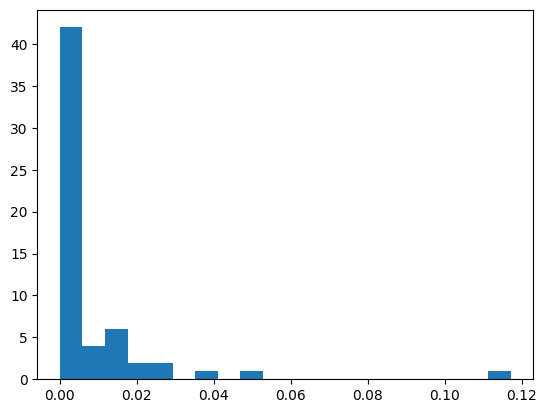

In [10]:
plt.hist(s, bins=20);

"This means that a microbial community is usually dominated by a few abundance organisms, whereas most other organisms are insignificant in the composition (but this doesn't mean that their functional roles are insignificant)." - Prof. Qiyun

After effective normalization, data from different samples can then be compared to each other. Ordination analysis, such as principal coordinate analysis (PCoA) [2], is often then applied to these normalized data to visualize broad trends of how similar or different bacterial populations are in certain sample types, such as healthy vs. sick patients (ordination is a general term for a family of techniques that summarize and project multivariate community data into lower-dimension space). This enables easy visual inspection of sample groupings, driven by sample bacterial content similarity/dissimilarity, and any association with sample metadata.[1]

[1] Weiss, S., Xu, Z.Z., Peddada, S. et al. Normalization and microbial differential abundance strategies depend upon data characteristics. Microbiome 5, 27 (2017). https://doi.org/10.1186/s40168-017-0237-y

[2] Gower JC. Some distance properties of latent root and vector methods used in multivariate analysis. Biometrika. 1966;53:325. doi:10.2307/2333639.

## Preliminary Modeling

In [11]:
X = microbiome_df.iloc[:, :-1].values 
y = microbiome_df['IR_IS_IS'].values

#### CLR transformation

In [12]:
# From Prof. Qiyun's Intro Notebook
def clr(s):
    s_ = np.log1p(s)
    return s_ - s_.mean()

In [13]:
X_clr = np.apply_along_axis(clr, 1, X)

In [14]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)
scores_train_LR = []
scores_test_LR= []

scores_train_KNN = []
scores_test_KNN= []

scores_train_RF = []
scores_test_RF= []

Fold 1 - TRAIN: [ 1  2  7  9 10 11 14 15 16 18 20 21 22 23 24 26 27 28 29 30 32 33 35 37
 38 39 40 41 42 43 44 46 48 50 51 52 55 56 58] TEST: [ 0  3  4  5  6  8 12 13 17 19 25 31 34 36 45 47 49 53 54 57]
Logistic Regression Predictions: [0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0.]


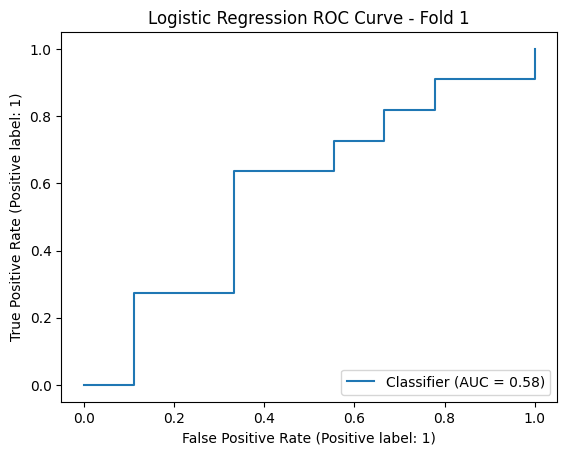

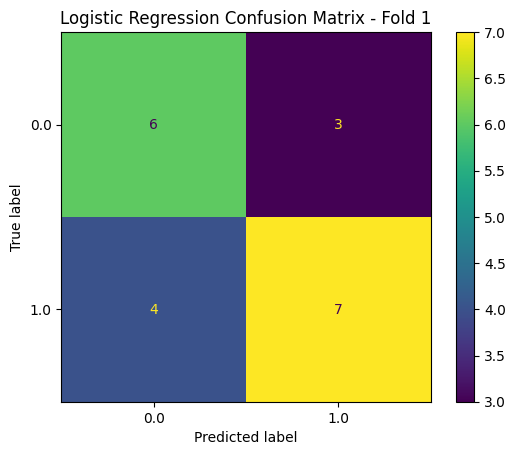

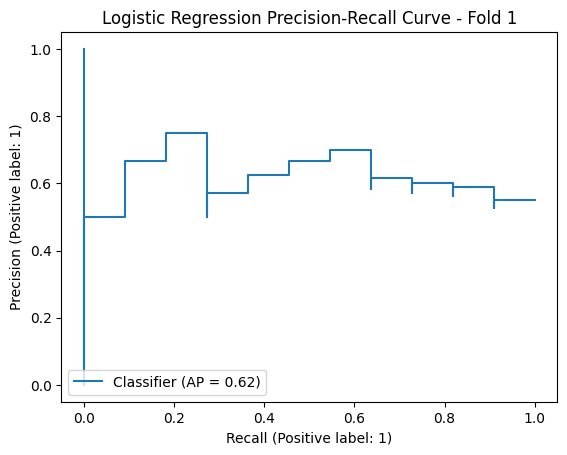

k-NN Predictions: [0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.]


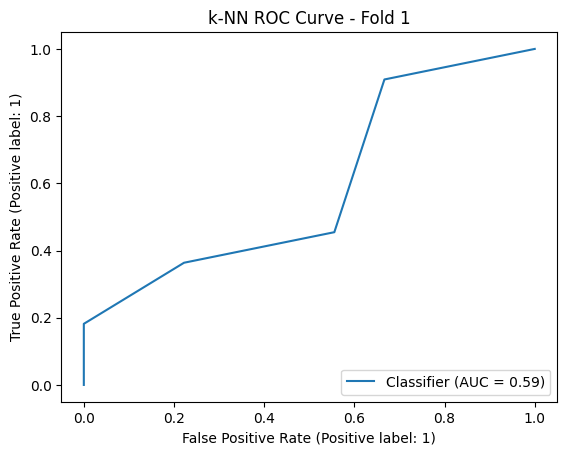

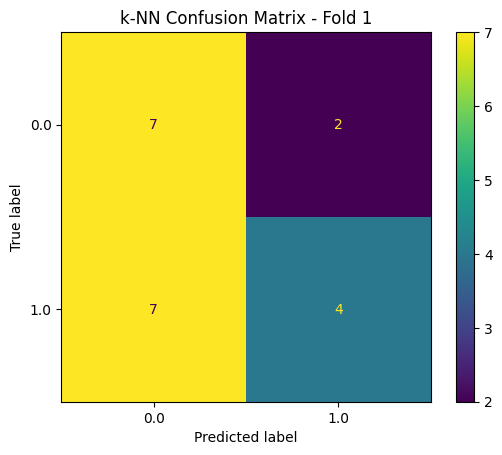

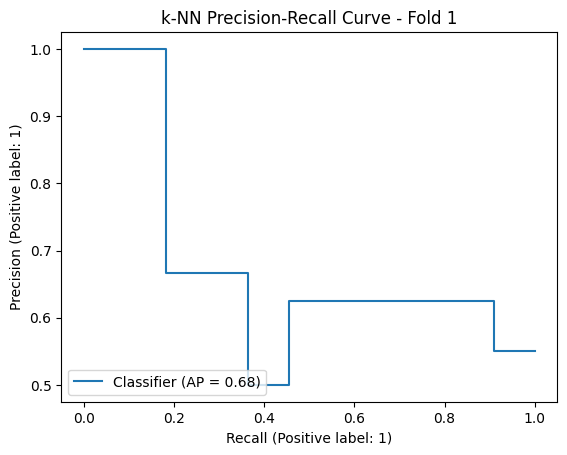

Random Forest Predictions: [0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.]


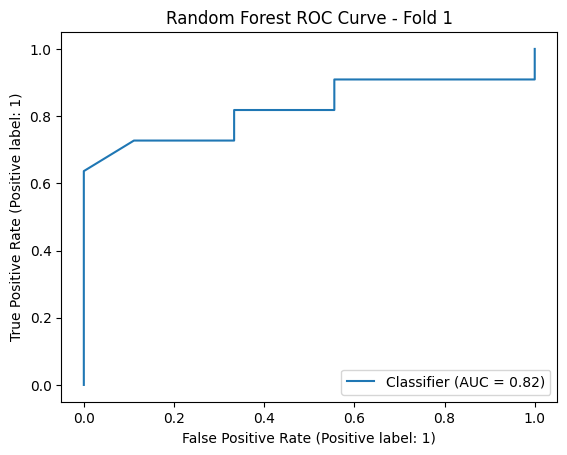

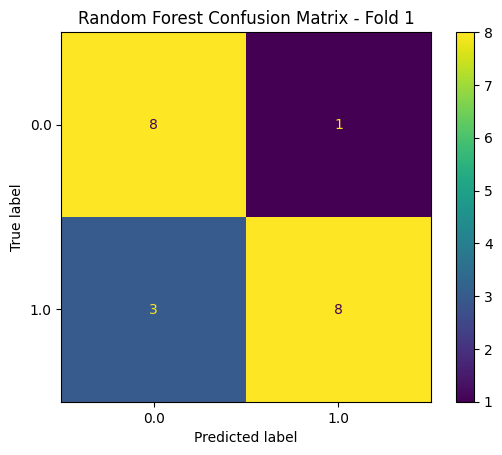

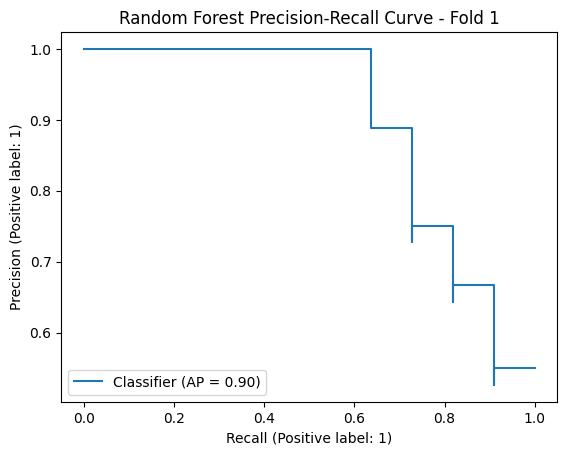

Fold 2 - TRAIN: [ 0  1  2  3  4  5  6  7  8 10 12 13 14 17 18 19 20 21 22 23 25 28 31 34
 35 36 38 39 42 45 46 47 48 49 51 53 54 57 58] TEST: [ 9 11 15 16 24 26 27 29 30 32 33 37 40 41 43 44 50 52 55 56]
Logistic Regression Predictions: [1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0.]


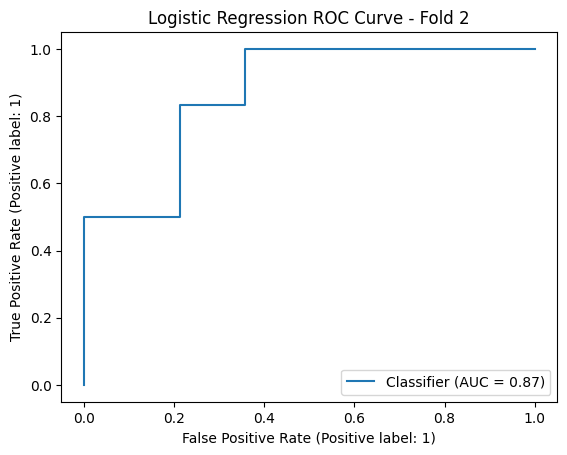

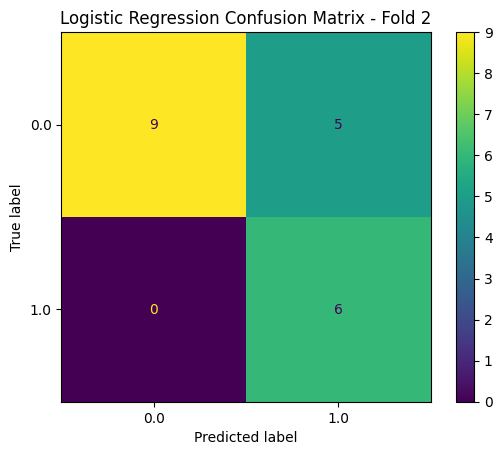

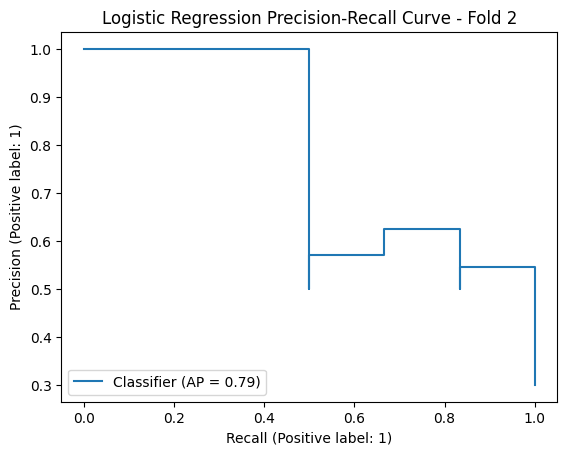

k-NN Predictions: [1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]


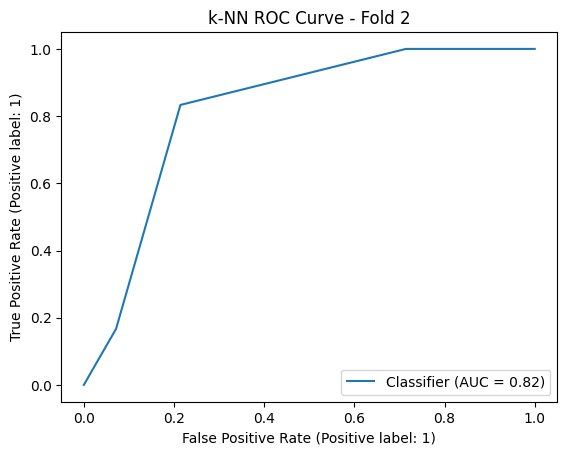

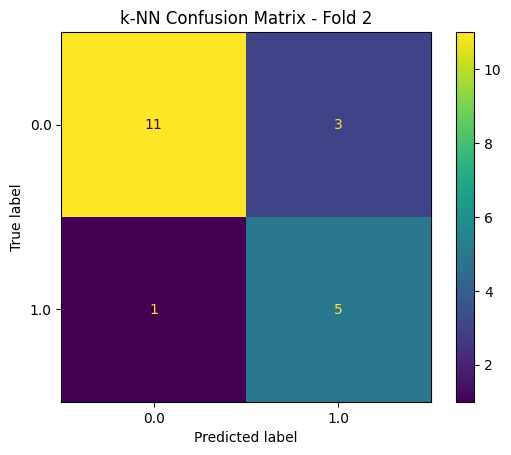

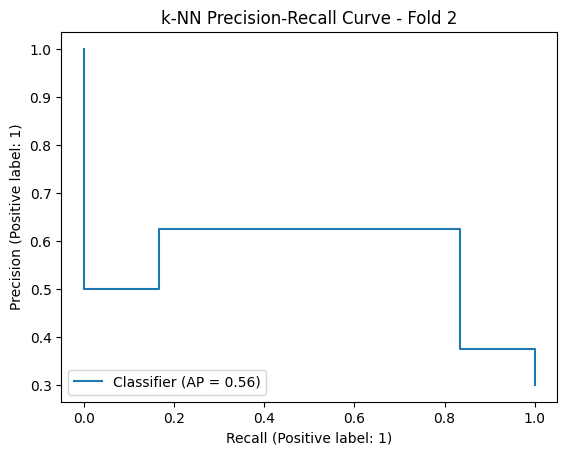

Random Forest Predictions: [1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.]


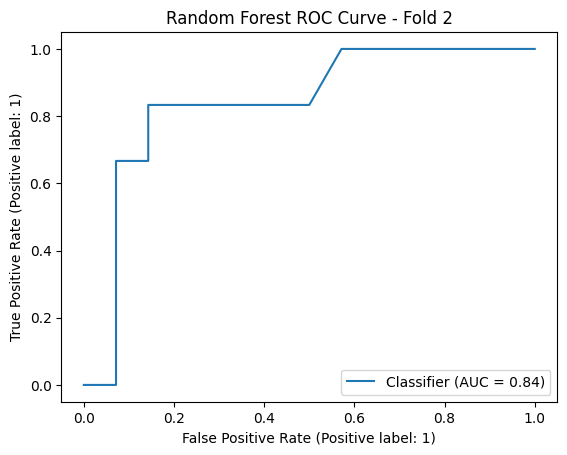

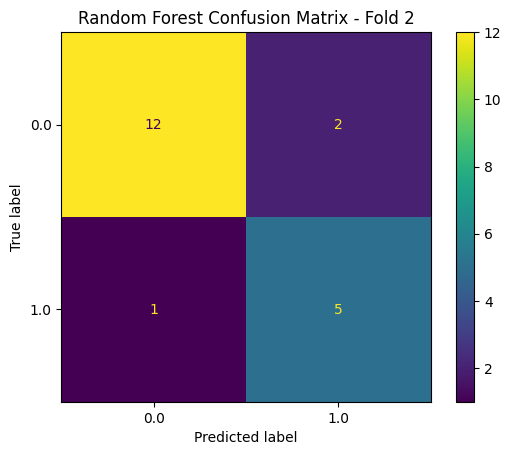

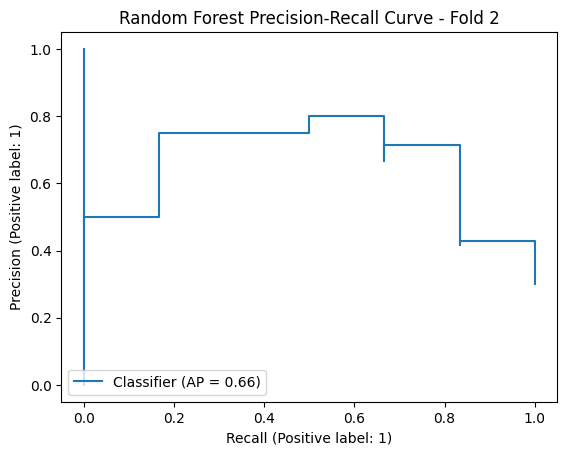

Fold 3 - TRAIN: [ 0  3  4  5  6  8  9 11 12 13 15 16 17 19 24 25 26 27 29 30 31 32 33 34
 36 37 40 41 43 44 45 47 49 50 52 53 54 55 56 57] TEST: [ 1  2  7 10 14 18 20 21 22 23 28 35 38 39 42 46 48 51 58]
Logistic Regression Predictions: [1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0.]


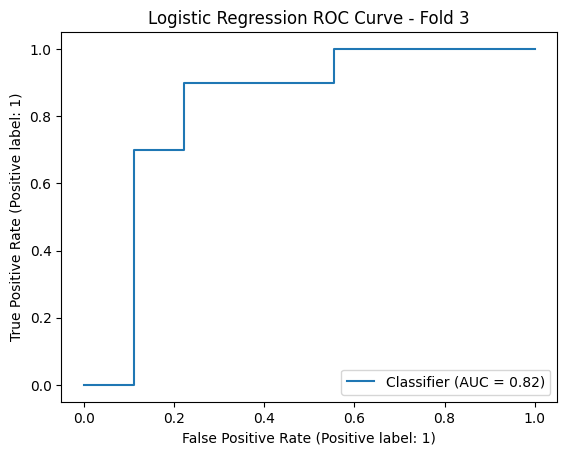

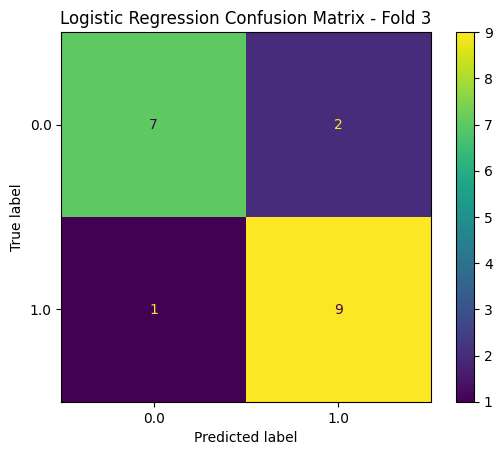

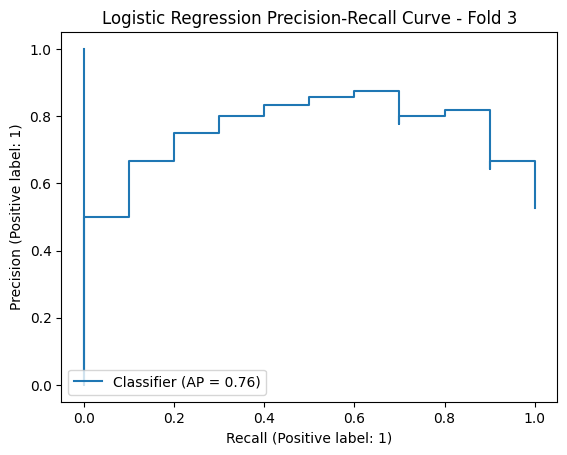

k-NN Predictions: [1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0.]


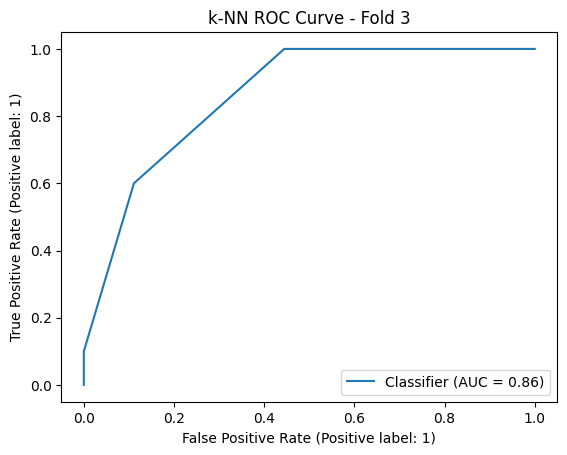

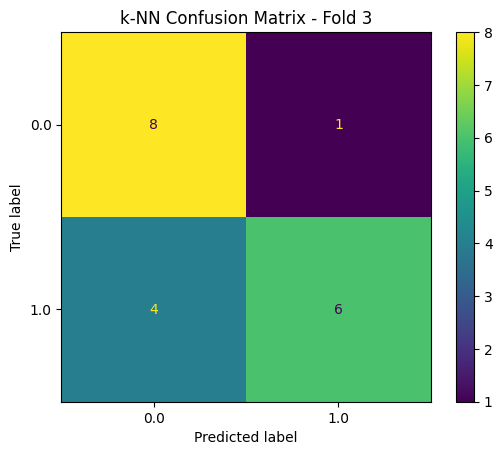

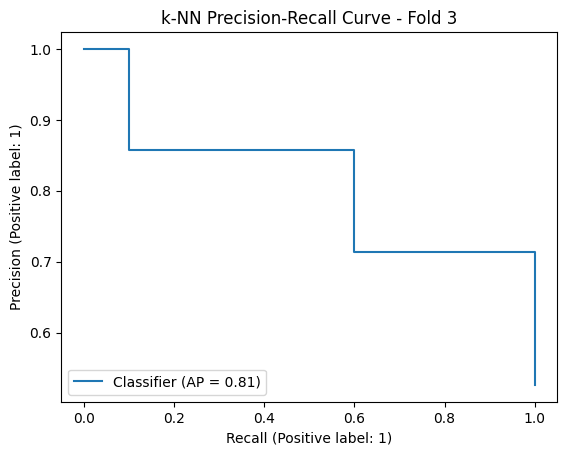

Random Forest Predictions: [0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.]


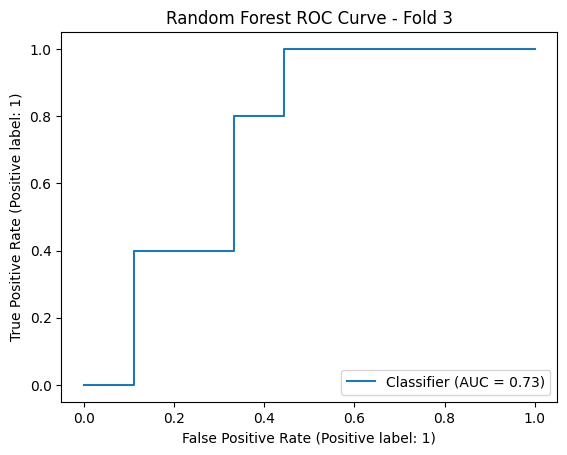

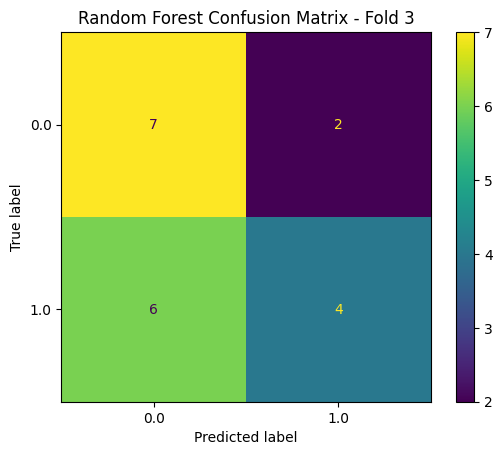

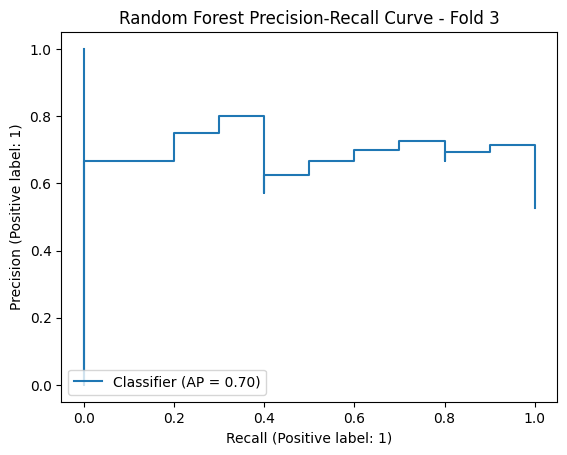


LR Mean train score: 1.0
LR Mean test score: 0.7473684210526316

KNN Mean train score: 0.7794871794871794
KNN Mean test score: 0.6956140350877194

RF train score: 1.0
RF Mean test score: 0.7429824561403509


In [16]:
# Perform the cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X_clr), 1):
    print(f"Fold {fold} - TRAIN:", train_index, "TEST:", test_index)
    # Splitting the data
    X_train, X_test = X_clr[train_index], X_clr[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Standardization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)  
    X_test = scaler.transform(X_test)  
          
    # Logistic Regression
    #-----------------------------------------------------------------------#
    LR = LogisticRegression(random_state=42).fit(X_train, y_train)
    score_tr_LR = LR.score(X_train, y_train)
    score_te_LR = LR.score(X_test, y_test)
    scores_train_LR.append(score_tr_LR)
    scores_test_LR.append(score_te_LR)
    y_pred_LR = LR.predict(X_test)
    print("Logistic Regression Predictions:", y_pred_LR)
    
    # ROC curve forLR
    y_prob_LR = LR.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_prob_LR)
    plt.title(f'Logistic Regression ROC Curve - Fold {fold}')
    plt.show()
    
    # Confusion Matrix for LR
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_LR)
    plt.title(f'Logistic Regression Confusion Matrix - Fold {fold}')
    plt.show()
    
    # Precision-Recall curve for LR
    PrecisionRecallDisplay.from_predictions(y_test, y_prob_LR)
    plt.title(f'Logistic Regression Precision-Recall Curve - Fold {fold}')
    plt.show()
    
    # KNN
    #-----------------------------------------------------------------------#
    knn = KNeighborsClassifier().fit(X_train, y_train)
    score_tr_KNN = knn.score(X_train, y_train)
    score_te_KNN = knn.score(X_test, y_test)
    scores_train_KNN.append(score_tr_KNN)
    scores_test_KNN.append(score_te_KNN)
    y_pred_KNN = knn.predict(X_test)
    print("k-NN Predictions:", y_pred_KNN)
    
    # ROC curve for KNN
    y_prob_KNN = knn.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_prob_KNN)
    plt.title(f'k-NN ROC Curve - Fold {fold}')
    plt.show()
    
    # Confusion Matrix for KNN
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_KNN)
    plt.title(f'k-NN Confusion Matrix - Fold {fold}')
    plt.show()
    
    # Precision-Recall curve for KNN
    PrecisionRecallDisplay.from_predictions(y_test, y_prob_KNN)
    plt.title(f'k-NN Precision-Recall Curve - Fold {fold}')
    plt.show()
    
    # Random Forest
    #-----------------------------------------------------------------------#
    rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
    score_tr_RF = rf.score(X_train, y_train)
    score_te_RF = rf.score(X_test, y_test)
    scores_train_RF.append(score_tr_RF)
    scores_test_RF.append(score_te_RF)
    y_pred_RF = rf.predict(X_test)
    print("Random Forest Predictions:", y_pred_RF)
    
    # ROC curve for RF
    y_prob_RF = rf.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_prob_RF)
    plt.title(f'Random Forest ROC Curve - Fold {fold}')
    plt.show()
    
    # Confusion Matrix for RF
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_RF)
    plt.title(f'Random Forest Confusion Matrix - Fold {fold}')
    plt.show()
    
    # Precision-Recall curve for RF
    PrecisionRecallDisplay.from_predictions(y_test, y_prob_RF)
    plt.title(f'Random Forest Precision-Recall Curve - Fold {fold}')
    plt.show()

print()
print("LR Mean train score:", np.mean(scores_train_LR))
print("LR Mean test score:", np.mean(scores_test_LR))
print()
print("KNN Mean train score:", np.mean(scores_train_KNN))
print("KNN Mean test score:", np.mean(scores_test_KNN))
print()
print("RF train score:", np.mean(scores_train_RF))
print("RF Mean test score:", np.mean(scores_test_RF))